In [2]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

In [3]:
# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/deeplearning"

In [7]:
# 2.2 Full file path:
path = Path(pathToFolder) / "mobile_price.csv"

In [8]:
# 3.0 Read data
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
# 3.1
mobile_price.shape
mobile_price.dtypes

(2000, 21)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
# 3.2 Get target and predictors:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [11]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [12]:
# 4.1
model.add(layers.Input( shape = (20,) ) )

In [13]:
model.add(layers.Dense(20,activation='relu') )

In [14]:
model.add(layers.Dense(880,activation='relu') )

In [15]:
# 4.2
model.add(layers.Dense(1))

In [16]:
#4.3 Compile
model.compile( loss = "mae")

In [17]:
# 4.4 Train
model.fit(X,y, epochs = 100 )

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 59.9229
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 46.4721
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 43.6524
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 40.2341
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 40.2271
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 38.2445
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 38.3852
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 38.7288
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 37.5325
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 37.5836
Epoch 11/100
63/63 [==============================] - 0s 1ms/step - loss: 37.2219
Epoch 12/100
63/63 [==============================] - 0s 1ms/step - loss: 36.9800
Epoch 13/100
63/63 [=====

In [18]:
# 5.0 Predict
pred = model.predict(X)

63/63 [==============================] - 0s 857us/step


In [19]:
# 5.1 Round up decimal places
pred = np.round(pred)

In [21]:
from tensorflow.keras.utils import plot_model

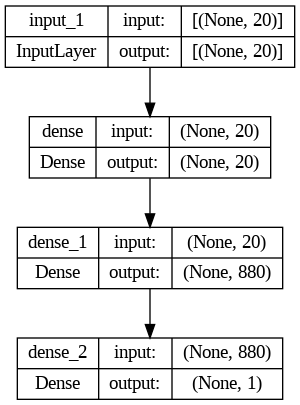

In [22]:
plot_model(model,show_shapes=True)